In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("blinkit_dataset.csv")

In [4]:
print("Shape:", df.shape)
print(df.head())

Shape: (500, 12)
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0          Item_1        10.62          Regular            0.038   
1          Item_2        19.26          Low Fat            0.236   
2          Item_3        15.98          Low Fat            0.161   
3          Item_4        13.98          Low Fat            0.090   
4          Item_5         7.34          Low Fat            0.043   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0         Dairy    231.68              OUT4                       2000   
1  Frozen Foods    217.71              OUT3                       2014   
2        Fruits     58.97              OUT4                       2019   
3         Dairy    169.44              OUT2                       2018   
4         Dairy    183.07              OUT2                       2009   

  Outlet_Size Outlet_Location_Type    Outlet_Type  Item_Outlet_Sales  
0       Large               Tier 2  Grocery Store         

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            500 non-null    object 
 1   Item_Weight                500 non-null    float64
 2   Item_Fat_Content           500 non-null    object 
 3   Item_Visibility            500 non-null    float64
 4   Item_Type                  500 non-null    object 
 5   Item_MRP                   500 non-null    float64
 6   Outlet_Identifier          500 non-null    object 
 7   Outlet_Establishment_Year  500 non-null    int64  
 8   Outlet_Size                500 non-null    object 
 9   Outlet_Location_Type       500 non-null    object 
 10  Outlet_Type                500 non-null    object 
 11  Item_Outlet_Sales          500 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 47.0+ KB
None


In [6]:
print(df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [7]:
df = df.dropna()

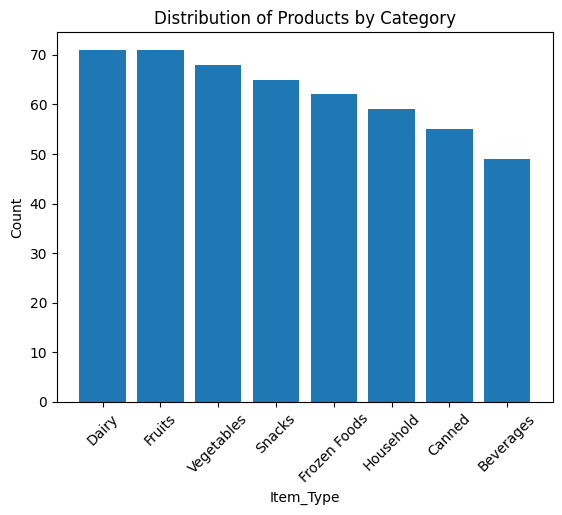

In [8]:
category_counts = df["Item_Type"].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=45)
plt.title("Distribution of Products by Category")
plt.xlabel("Item_Type")
plt.ylabel("Count")
plt.show()

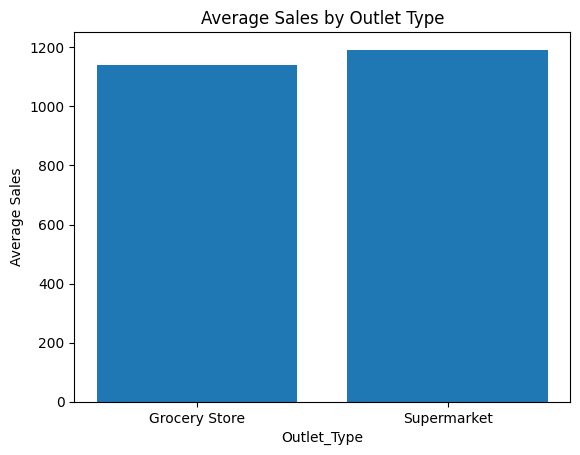

In [9]:
avg_sales = df.groupby("Outlet_Type")["Item_Outlet_Sales"].mean()
plt.bar(avg_sales.index, avg_sales.values)
plt.title("Average Sales by Outlet Type")
plt.xlabel("Outlet_Type")
plt.ylabel("Average Sales")
plt.show()

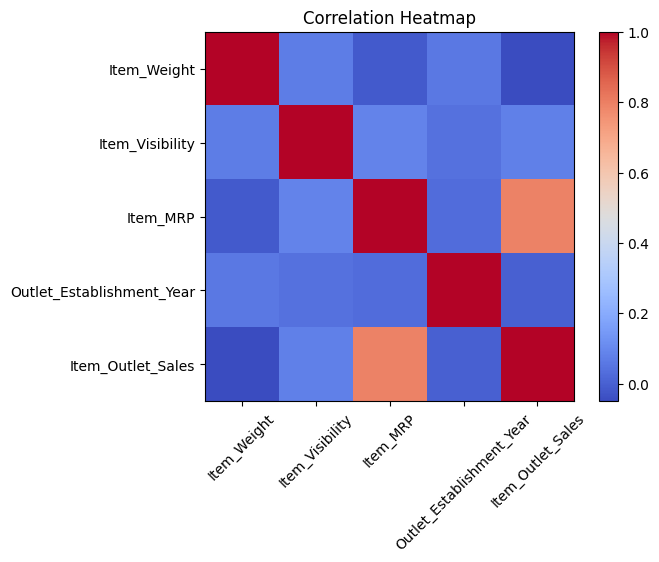

In [10]:
corr = df.corr(numeric_only=True)
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
X = df[["Item_MRP"]]
y = df["Item_Outlet_Sales"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

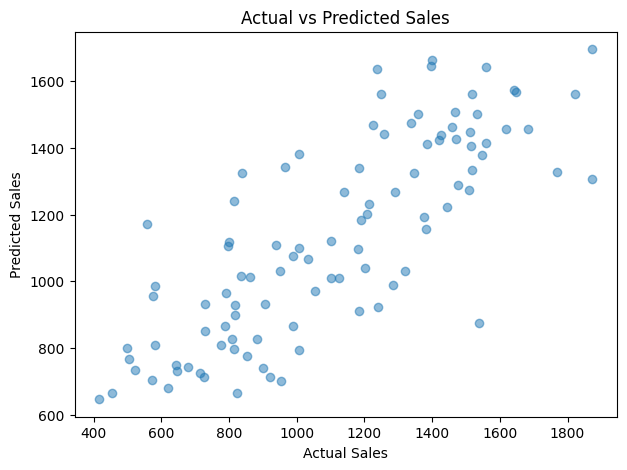

In [15]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()